In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

#***Importing Helpful Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

%matplotlib inline

from sklearn.cluster import KMeans

import warnings
import os

warnings.filterwarnings("ignore")

from google.colab import drive

drive.mount('/content/drive')

#***Importing Dataset***

In [ ]:
mall_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Projects/Mall Customer_Segmentation/Mall_Customers.csv')

In [ ]:
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall_data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
mall_data.shape

(200, 5)

In [ ]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mall_data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#***Visualization***

*Histograms*

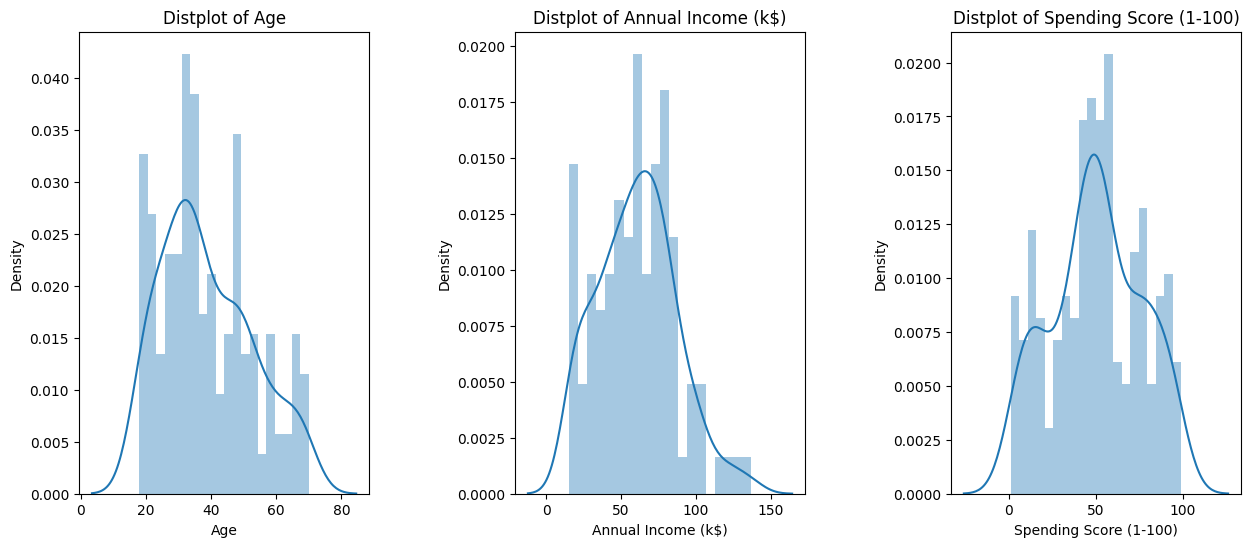

In [35]:
plt.figure(1, figsize = (15, 6))
n = 0

for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(mall_data[i], bins = 20)
  plt.title("Distplot of {}".format(i))

plt.show()

*Gender's Countplot*



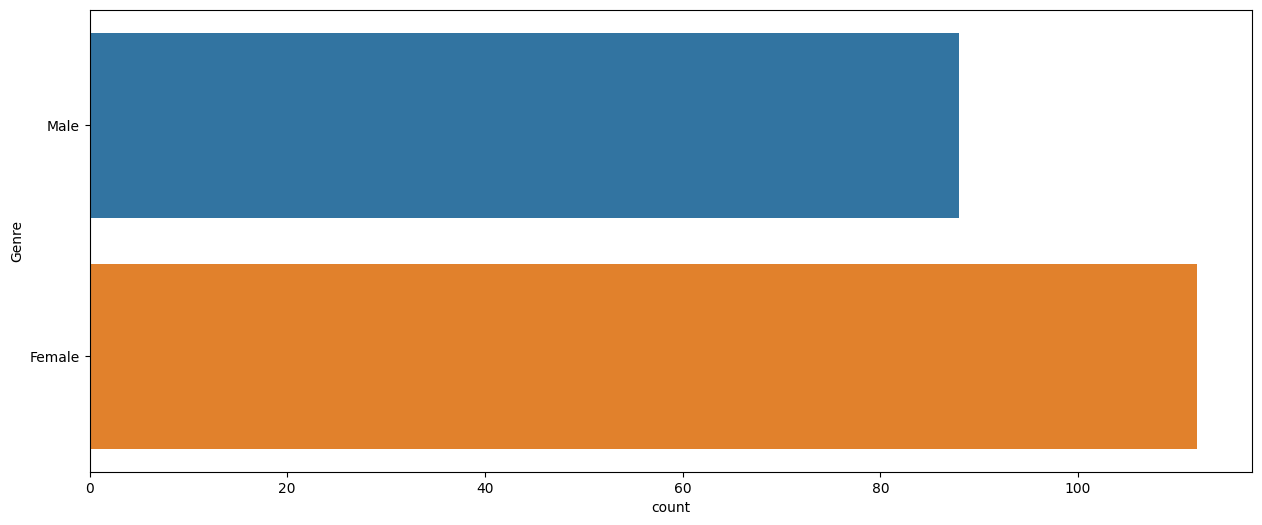

In [ ]:
plt.figure(1, figsize = (15,6))
sns.countplot(y = "Genre", data = mall_data)
plt.show()

*Visualiation to show Relation b/w Age, Annual Income and Spending Score*

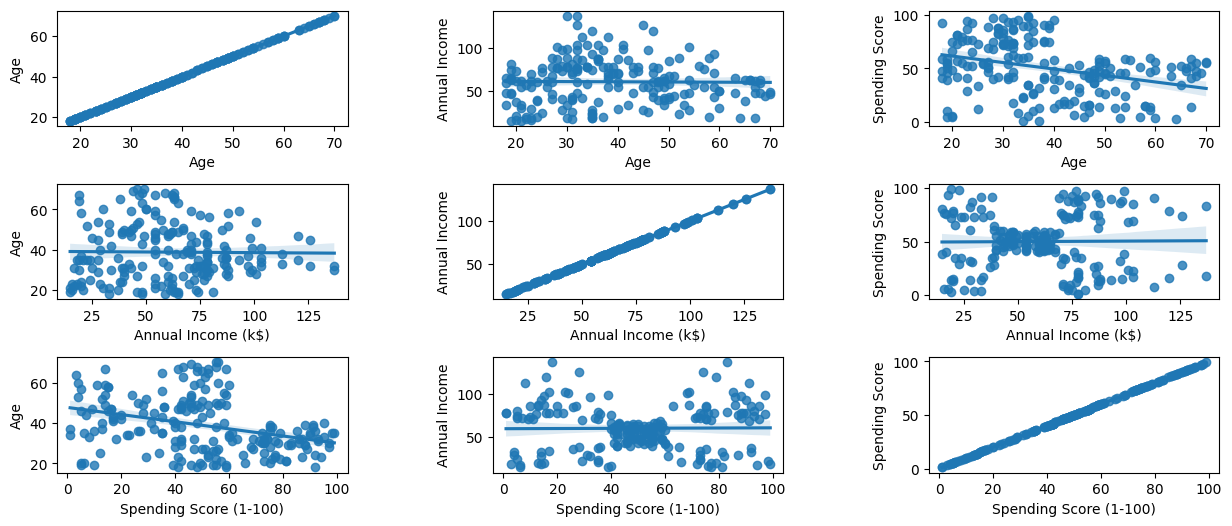

In [ ]:
plt.figure(1, figsize = (15,6))
n = 0

for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  for j in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.regplot(x = i, y = j, data = mall_data)
    plt.ylabel(j.split()[0] + ' ' + j.split()[1] if len(j.split()) > 1 else j)

plt.show()

*Scatter Plot for Age vs Annual Income on the Basis of Gender*

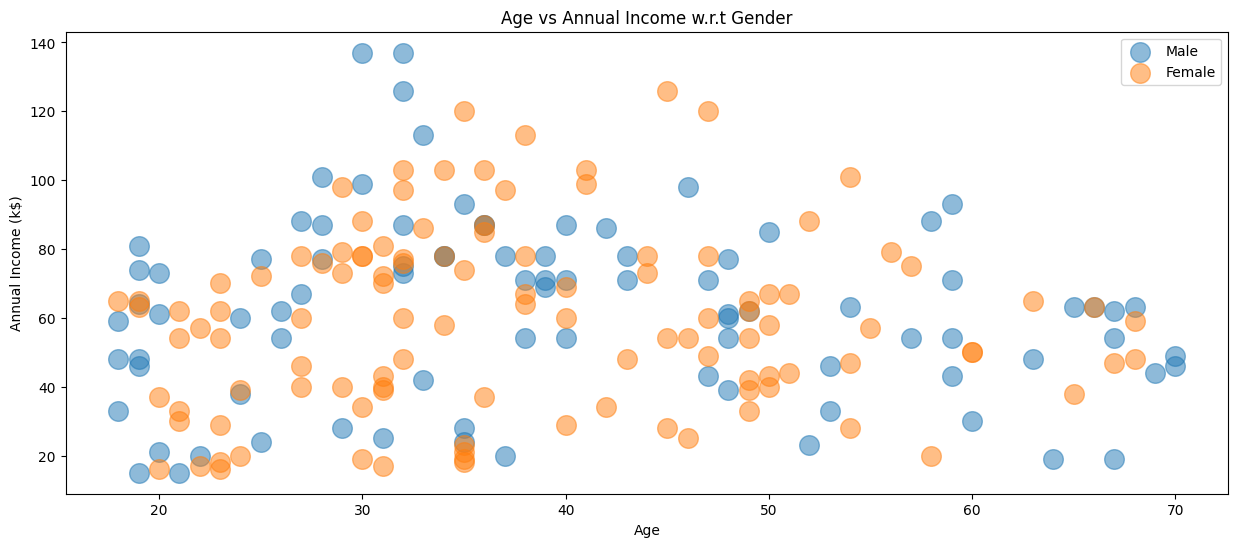

In [ ]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
  plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = mall_data[mall_data['Genre'] == gender], s = 200, alpha = 0.5, label = gender)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

*Scatter Plot for Annual Income vs Spending Score w.r.t Gende*

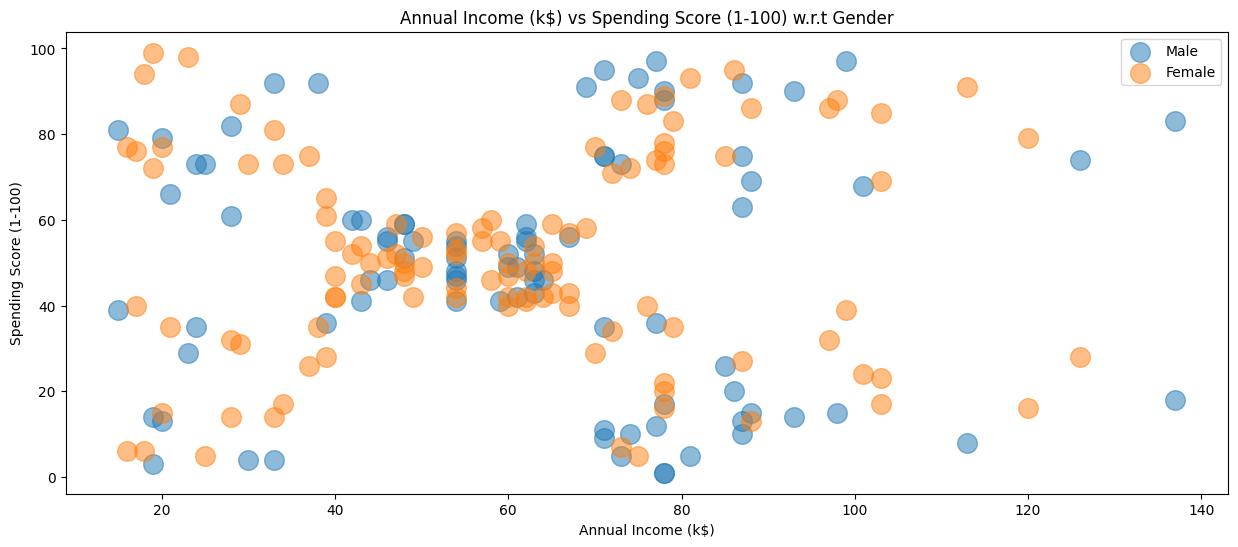

In [ ]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
  plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall_data[mall_data['Genre'] == gender], s = 200, alpha = 0.5, label = gender)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100) w.r.t Gender')
plt.legend()
plt.show()

*Distribution of values in Age , Annual Income and Spending Score according to Gender*

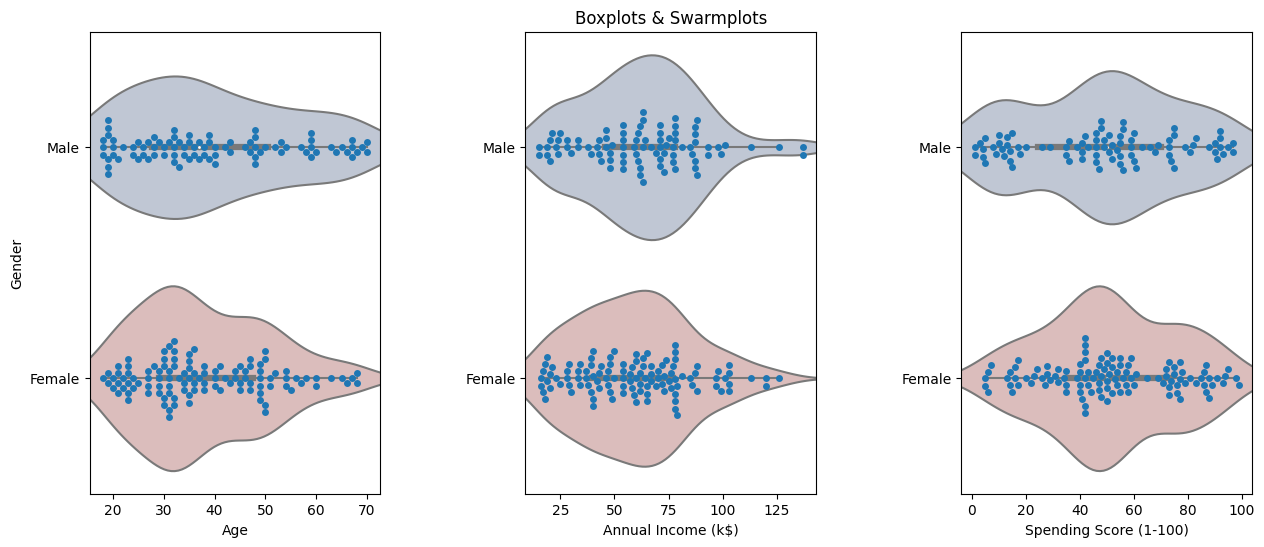

In [36]:
plt.figure(1, figsize = (15, 6))
n = 0

for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x = cols, y = 'Genre', data = mall_data, palette = 'vlag')
  sns.swarmplot(x = cols, y = 'Genre', data = mall_data)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title("Boxplots & Swarmplots" if n == 2 else '')

plt.show()

#***Clustering Using K-Means***

*1. Segmentation using Age and Spending Score*

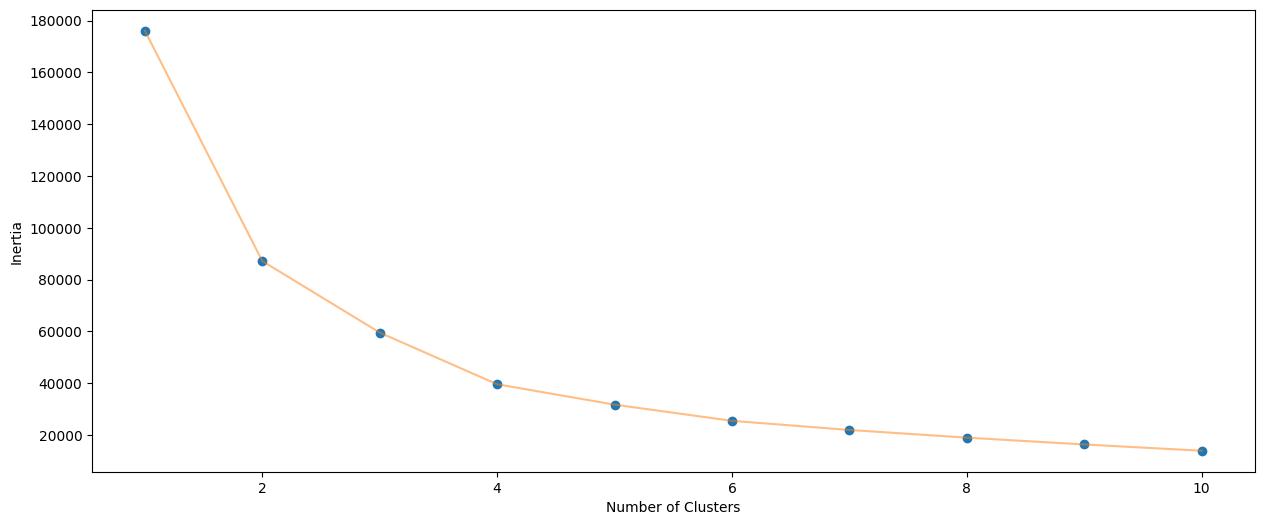

In [46]:
X1 = mall_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :2].values
inertia = []

for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

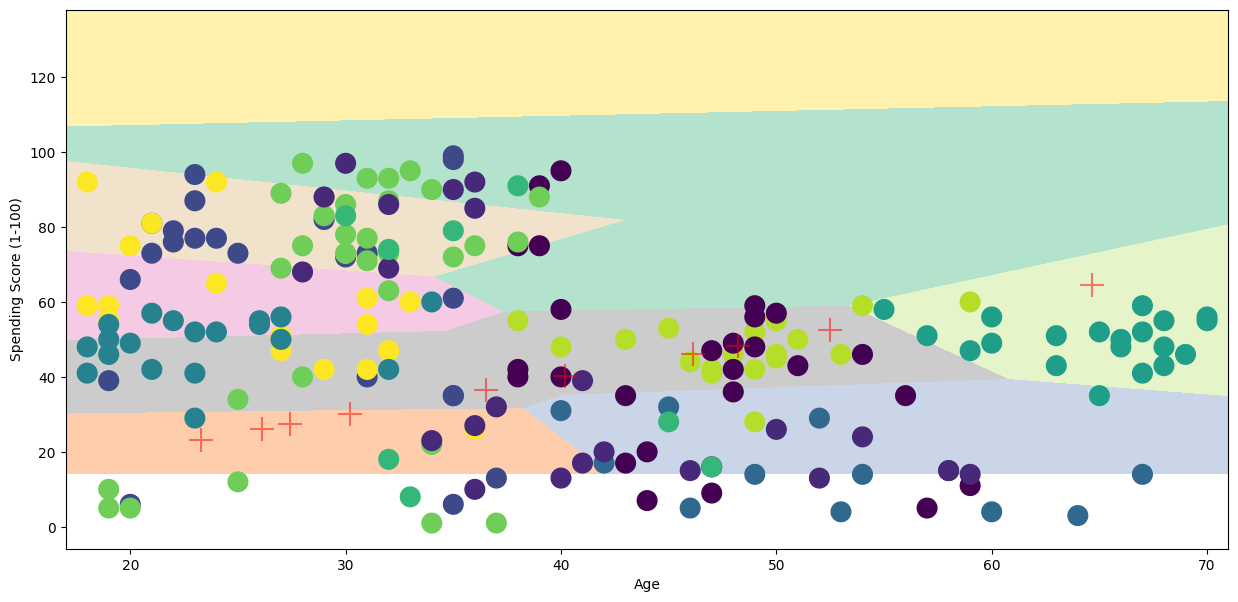

In [47]:
algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = mall_data, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 0], s = 300, c = 'red', marker = '+', alpha = 0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

*2. Annual Income and Spending Score*

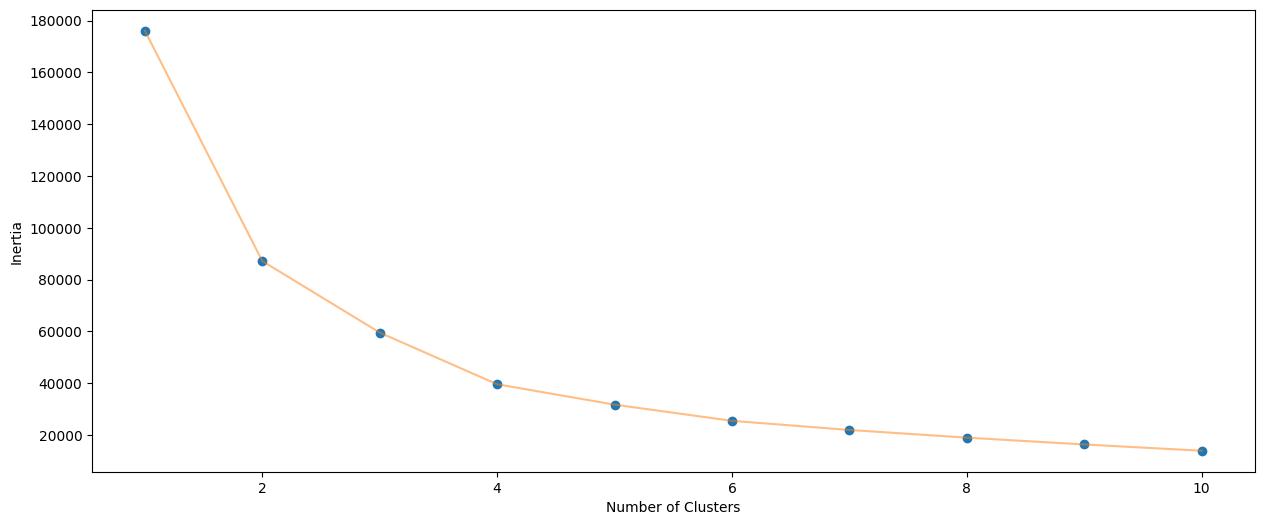

In [48]:
X2 = mall_data[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :2].values
inertia = []

for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

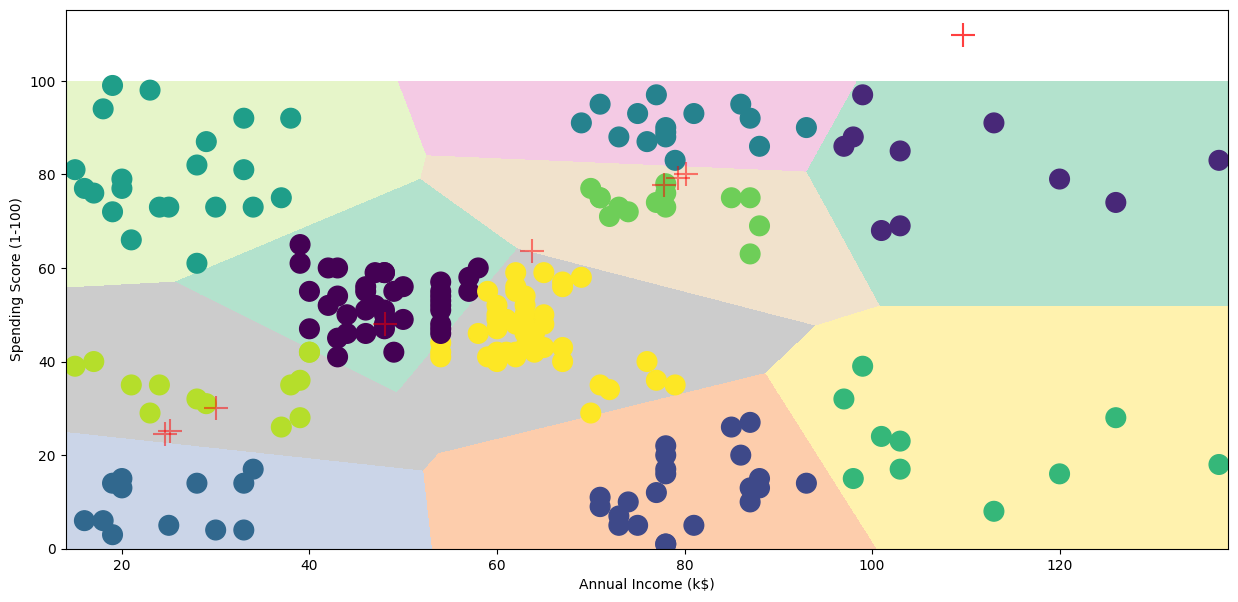

In [49]:
algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
algorithm.fit(X2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall_data, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 0], s = 300, c = 'red', marker = '+', alpha = 0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

*3. Segmentation using Age, Annual Income and Spending Space*

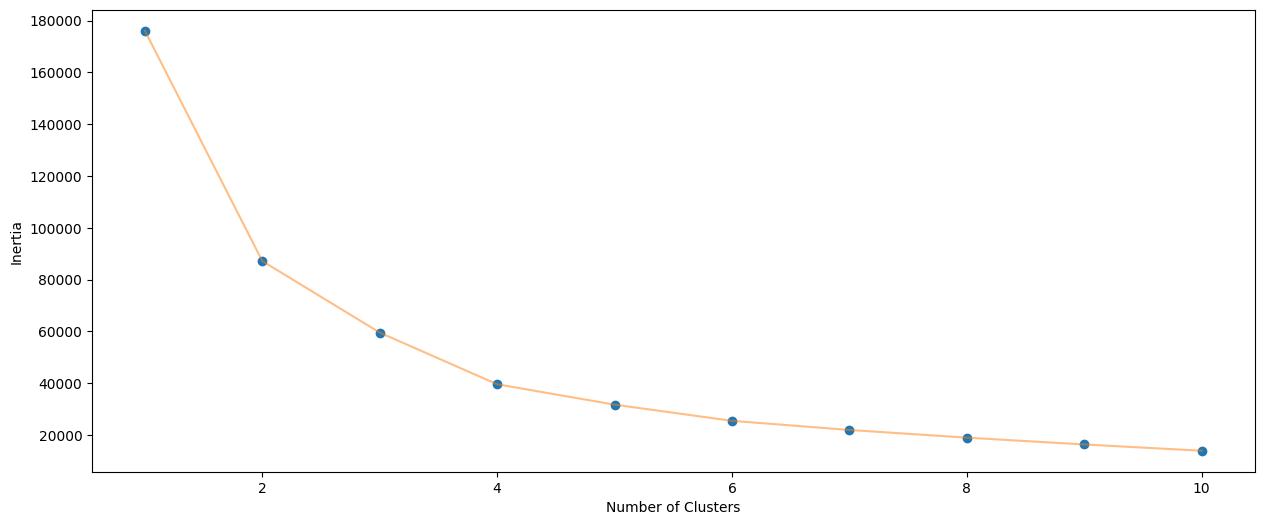

In [50]:
X3 = mall_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :2].values
inertia = []

for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
  algorithm.fit(X3)
  inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [51]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init =
10 ,max_iter=300,
 tol=0.0001, random_state= 111 ,
algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
mall_data['label3'] = labels3
trace1 = go.Scatter3d(x= mall_data['Age'], y= mall_data['Spending Score (1-100)'], z= mall_data['Annual Income (k$)'], mode='markers', marker=dict(color = mall_data['label3'], size= 20, line=dict(color= mall_data['label3'], width= 12), opacity=0.8))
data = [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0 ), title= 'Clusters', scene = dict(xaxis = dict(title = 'Age'), yaxis = dict(title = 'Spending Score'), zaxis = dict(title = 'Annual Income')))

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)